<a href="https://colab.research.google.com/github/ucfilho/Biochemical_Engineering/blob/master/McCabe_Thiele_method_maio_23_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, ceil
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import  differential_evolution
from scipy.optimize import fsolve

In [2]:
# equilibrium data-ethanol
xeq_d =[0.0010, 0.0061, 0.0145, 0.0237, 0.0310, 0.0490, 0.0652, 0.0968, 
        0.1394, 0.3261, 0.4635, 0.5413, 0.6856, 0.7760, 0.8403, 0.9037, 0.9725, 0.9804]

yeq_d =[0.0047, 0.0721, 0.1539, 0.2301, 0.2851, 0.3559, 0.4181, 0.4534, 0.5314, 0.6047,
        0.6518, 0.6751, 0.7451, 0.8005, 0.8457, 0.9010, 0.9721, 0.9774]

curve = 1
# Test function with coefficients as parameters
def test(x, a,b,c,d): # curve 1
  y=((a+b*x)/(1+c*x+d*x**2))
  return y

# Test function with coefficients as parameters
def test2(x, a,b,c,d,e,f): #curve 2
  y=((a+b*x+c*x**2)/(1+d*x+e*x**2+f*x**3))
  return y

# curve_fit() function takes the test-function
# x-data and y-data as argument and returns 
# the coefficients a and b in param and
# the estimated covariance of param in param_cov
if curve == 1:
  param, param_cov = curve_fit(test, xeq_d, yeq_d)
else:
  param, param_cov = curve_fit(test2, xeq_d, yeq_d)  
  
print("Sine funcion coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

Sine funcion coefficients:
[-3.23759793e-02  2.09090072e+01  3.74014471e+01 -1.70175744e+01]
Covariance of coefficients:
[[ 3.70331731e-04 -3.42296427e-02 -6.79681444e-02  3.38414382e-02]
 [-3.42296427e-02  5.44393977e+00  1.13476298e+01 -5.95901316e+00]
 [-6.79681444e-02  1.13476298e+01  2.43014018e+01 -1.31615210e+01]
 [ 3.38414382e-02 -5.95901316e+00 -1.31615210e+01  7.42387637e+00]]


In [3]:
def ELV(xeq_d, curve = curve):
  y_ans = []
  for xi in xeq_d:
    if curve ==1:
      yi = test(xi,*param)
    else:
      yi = test2(xi,*param)
    y_ans.append(yi)
  return y_ans
  

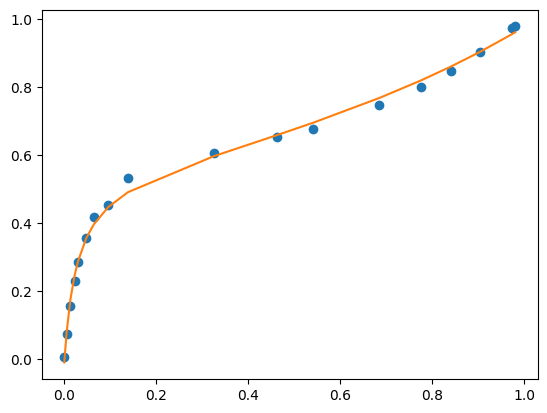

In [4]:
plt.plot(xeq_d,yeq_d,'o')
plt.plot(xeq_d,ELV(xeq_d))

In [5]:

# 95.63 wt% ethanol and 4.37 wt% water
#xD = (95.63/46)/(95.63/46+4.37/18);print('xD:',xD)
xD = 0.8943;print('xD:',xD)
#D = D_et/xD; print('D (kmol/d):',D)
xW = (0.5/46)/(0.5/46+99.5/18);print('xW:',xW)
x0 = 85/46/(85/46+915/18);print('x0:',x0)
F = 400*780/85;print('F m3/d:',F)
Feed = F*(85/46+915/18); print('Feed:',Feed)
D =Feed*(x0-xW)/(xD-xW);print('D:',D)
W = Feed -D; print('W:',W)

Ln = 3*D # reflux ratio of 3 kmolkmol product
Lm = Ln + Feed
Vn = Ln + D
Vm = Lm - W
# yn = Ln/Vn*x+ D/Vn*xD
# ym = Lm/Vm*x- W/Vm*xW
# yn = ym
#  Lm/Vm*x- W/Vm*xW = Ln/Vn*x+ D/Vn*xD
#  (Lm/Vm-Ln/Vn)*x =  D/Vn*xD+ W/Vm*xW
#  xI = (D/Vn*xD+ W/Vm*xW)/(Lm/Vm-Ln/Vn)
xInt = (D/Vn*xD+ W/Vm*xW)/(Lm/Vm-Ln/Vn); print('xInt:',xInt)
ya = Ln/Vn*xInt+ D/Vn*xD
yb = Lm/Vm*xInt- W/Vm*xW
print('interc',ya,yb)
def yn(x,Ln=Ln,xD=xD,Vn=Vn, D = D):
  yn = Ln/Vn*x+ D/Vn*xD
  return yn

def ym(x,Lm=Lm,xW=xW,Vm=Vm, W = W):
  ym = Lm/Vm*x- W/Vm*xW
  return ym
'''
Feed = D + W--> W = Feed - D
Feed*x0 = D*xD + W*xW
Feed*x0 = D*xD +(Feed-D)*xW--> Feed*x0-Feed*xW = D(xD-xW)--> D =Feed*(x0-xW)/(xD-xW)

'''

xD: 0.8943
xW: 0.0019624945486262538
x0: 0.035075653370013754
F m3/d: 3670.5882352941176
Feed: 193370.84398976984
D: 7175.67000080321
W: 186195.17398896662
xInt: 0.03507565337001377
interc 0.24988174002751032 0.24988174002751032


'\nFeed = D + W--> W = Feed - D\nFeed*x0 = D*xD + W*xW\nFeed*x0 = D*xD +(Feed-D)*xW--> Feed*x0-Feed*xW = D(xD-xW)--> D =Feed*(x0-xW)/(xD-xW)\n\n'

In [6]:
y1,y2=[],[]
x1,x2=[],[]
x = np.linspace(0,1,1001)
for xi in x:
  if xi > xInt:
    y2.append(yn(xi))
    x2.append(xi)
  else:
    y1.append(ym(xi))
    x1.append(xi)

In [7]:
#y2
Lm,Ln,Vn,Vm,Feed

(214897.85399217947,
 21527.010002409632,
 28702.68000321284,
 28702.680003212852,
 193370.84398976984)

In [8]:
xD #

0.8943

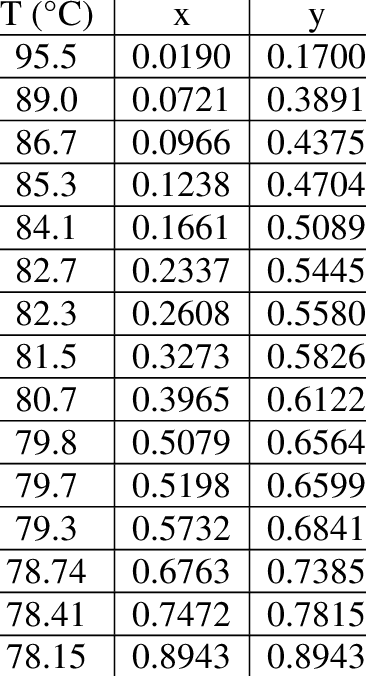

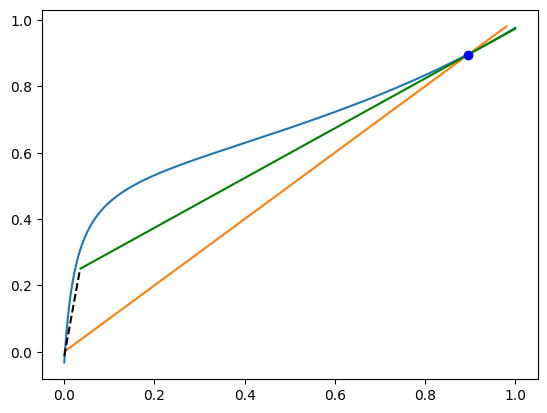

In [9]:
xeq = np.linspace(0,1,1001)
plt.plot(xeq,ELV(xeq))
plt.plot(xeq_d,xeq_d)
plt.plot(x1,y1,'--k')
plt.plot(x2,y2,'g')
plt.plot(xD,ELV([xD]),'ob')

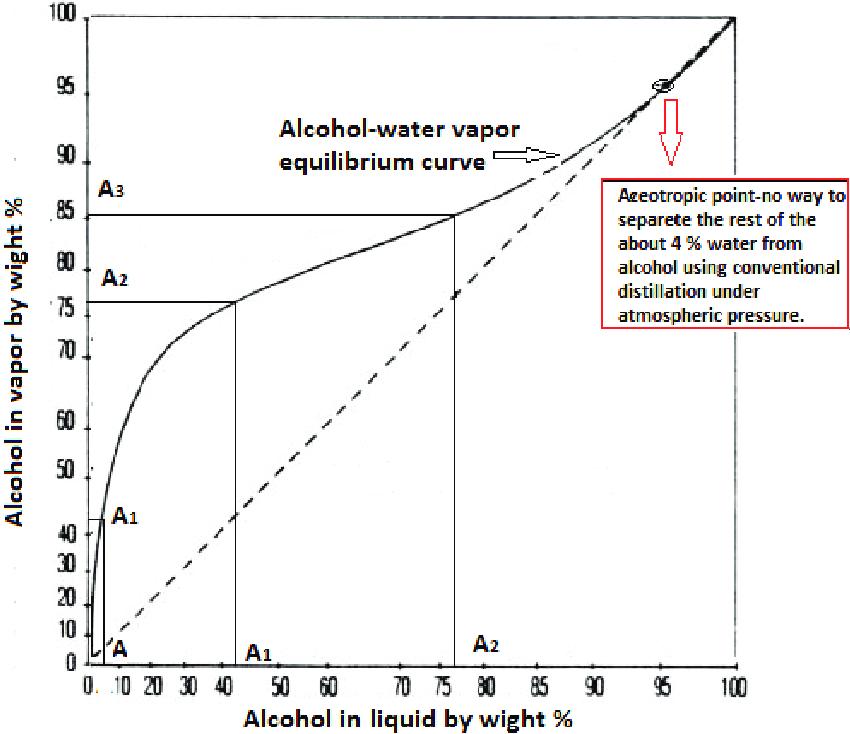

In [10]:
def Feed(x):
    f=[]
    f.append(x[0]+x[1]-100)#                    #Overall mass Balance
    f.append(0.9*x[0]+.1*x[1]-(100*.4))        #A balance on MVC,benzene
    return f
x = [50, 50]
product = fsolve(Feed,x)

In [11]:
x = np.linspace(0,1,1001)
y =  ELV(x)
y_eq, x_eq = y, x

In [12]:
xF = 0.35        # Light component mole fraction in feed, -
xD = 0.975       # Light component mole fraction in distillate, -
xW = 0.025       # Light component mole fraction in reboiler, -
R = 1.5          # Reflux ratio (L/D), -
a = 2.5          # Separation factor
q = 1.5          # Feed condition

In [13]:
######## Feed line ########
def fed(xF,q,param=param):   
  def funSolve(x,param=param, q=q, xF = xF):
    a, b, c, d, e , f = param
    y1 = q/(q-1)*x - xF/(q-1)
    y2=((a+b*x+c*x**2)/(1+d*x+e*x**2+f*x**3))
    fun = y2 -y1
    return fun

  bounds = [(0,1)]
  res = differential_evolution(funSolve, bounds)
  xiE =res.x
  #print(xiE)
  #yiE = ELV(xiE)
  yiE = test2(xiE,*param)
  xiE,yiE =xiE[0],yiE[0]
  if yiE>1:
    yiE =1 
  #print(yiE)
  if q == 1:
    x_fed = [xF, xF]
    y_fed = [xF, yiE]
  else:
    x_fed = np.linspace(xF, xiE, 51)
    y_fed = q/(q-1)*x_fed - xF/(q-1)
    
  return xiE, yiE, y_fed, x_fed

xiE, yiE, y_fed, x_fed = fed(xF,q,param=param)

RuntimeError: ignored

In [ ]:
######## R_min & R (new) ########
R_min = (xD-yiE)/(yiE-xiE)
R = R*R_min

In [ ]:
######## Feed Point ########
xiF = (xF/(q-1)+xD/(R+1))/(q/(q-1)-R/(R+1))
yiF = R/(R+1)*xiF + xD/(R+1)
######## Rectifying section ########
def rect(R,xD,xiF):
    x_rect = np.linspace(xiF-0.025,xD,51)    
    y_rect = R/(R+1)*x_rect + xD/(R+1)
    return y_rect,x_rect
y_rect, x_rect = rect(R, xD,xiF)
######## Stripping section ########
def stp(xiF,yiF,xW):
    x_stp = np.linspace(xW,xiF+0.025,51)    
    y_stp = ((yiF-xW)/(xiF-xW))*(x_stp-xW) + xW
    return y_stp,x_stp
y_stp, x_stp = stp(xiF,yiF,xW)

In [ ]:
######## Stage Construction ########
s = np.zeros((1000,5)) # Empty array (s) to calculate coordinates of stages
for i in range(1,1000):
    # (s[i,0],s[i,1]) = (x1,y1) --> First point
    # (s[i,2],s[i,3]) = (x2,y2) --> Second point
    # Joining (x1,y1) and (x2,y2) will result into stages
    
    s[0,0] = xD
    s[0,1] = xD
    s[0,2] =  test2(xD,*param)
    #s[0,2] = s[0,1]/(a-s[0,1]*(a-1))
    s[0,3] = s[0,1]
    s[0,4] = 0
# x1
    s[i,0] = s[i-1,2]
    
    # Breaking step once (x1,y1) < (xW,xW)
    if s[i,0] < xW:
        s[i,1] = s[i,0] 
        s[i,2] = s[i,0]
        s[i,3] = s[i,0]
        s[i,4] = i
        break  
    
    # y1
    if s[i,0] > xiF:
        s[i,1] = R/(R+1)*s[i,0] + xD/(R+1)
    elif s[i,0] < xiF:
        s[i,1] = ((yiF-xW)/(xiF-xW))*(s[i,0]-xW) + xW
    else:
        s[i,1] = s[i-1,3]
    
    # x2
    if s[i,0] > xW:
        #s[i,2] = s[i,1]/(a-s[i,1]*(a-1))
        s[i,2] =  test2(s[i,1],*param)
        #print(s[i,2],'======')
    else:
        s[i,2] = s[i,0]
    
    # y2
    s[i,3] = s[i,1]
    
    # No of stages
    if s[i,0] < xiF:
        s[i,4] = i
    else:
        s[i,4] = 0
s = s[~np.all(s == 0, axis=1)] # Clearing up zero containing rows
s_rows = np.size(s,0)  
#print(s)
S = np.zeros((s_rows*2,2)) # Empty array to rearragne 's' array for plotting
for i in range(0,s_rows):
    S[i*2,0] = s[i,0]
    S[i*2,1] = s[i,1]
    S[i*2+1,0] = s[i,2]
    S[i*2+1,1] = s[i,3]
######## Stage Numbering ########
# (x2,y2) from 's' array as (x_s,y_s) used for stage numbering
x_s = s[:,2:3]
y_s = s[:,3:4]
stage = np.char.mod('%d', np.linspace(1,s_rows-1,s_rows-1))

In [ ]:
# The location of feed plate is determined by:
s_f = s_rows-np.count_nonzero(s[:,4:5], axis=0)
print(s_f)

In [ ]:
#x_fed

In [ ]:
#x_stp,y_stp

In [ ]:
fig = plt.figure(num=None, figsize=(7, 6), dpi=600)
# Parity line
plt.plot([0,1],[0,1],"k-")
# Equilibrium curve
plt.plot(x_eq,y_eq,"r-", label="Equilibrium Curve")
# Rectifying section line
plt.plot(x_rect,y_rect,'k--', label="Rectifying Section OL") 
# Stripping section line
plt.plot(x_stp,y_stp,'k-.', label="Stripping Section OL")
# Feed line
plt.plot(x_fed,y_fed,'k:', label="Feed OL")
# Stages
plt.plot(S[:,0],S[:,1],'b-', label="Stages")
# Stage numbers
for label, x, y in zip(stage, x_s, y_s):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(0,5),
                 textcoords='offset points', 
                 ha='right')
# Feed, Distillate and Reboiler points
plt.plot(xF,xF,'go',xD,xD,'go',xW,xW,'go',markersize=5)   
plt.text(xF+0.05,xF-0.03,'($x_{F}, x_{F}$)',horizontalalignment='center')
plt.text(xD+0.05,xD-0.03,'($x_{D}, x_{D}$)',horizontalalignment='center')
plt.text(xW+0.05,xW-0.03,'($x_{W}, x_{W}$)',horizontalalignment='center')
# Intersection: Rectifying + Stripping + Feedline
plt.plot(xiF,yiF,'go',markersize=5)
plt.text(xiF+0.05,yiF-0.05,'($x_{iF}, y_{iF}$)',horizontalalignment='center')
# Creating a nice output boxes
textstr1 = '\n'.join((
    r'$Input:$',
    r'$\alpha=%.1f$' % (a, ),
    r'$q=%.2f$' % (q, ),
    r'$x_F=%.2f$' % (xF, ),
    r'$x_D=%.2f$' % (xD, ),
    r'$x_B=%.2f$' % (xW, )))
textstr2 = '\n'.join((
    r'$Output:$',
    r'$R_{min}=%.2f$' % (R_min, ),
    r'$R=%.2f$' % (R, ),
    r'$Stages=%.0f$' % (s_rows-1, ),
    r'$Feed \:Stage=%.0f$' % (s_f, )))
# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.65, 0.25, textstr1, fontsize=10, verticalalignment='bottom', bbox=props)
plt.text(0.65, 0.0, textstr2, fontsize=10, verticalalignment='bottom', bbox=props)
# General plot settings
#plt.grid(b=True, which='major',linestyle=':',alpha=0.6)
#plt.grid(b=True, which='minor',linestyle=':',alpha=0.3)
plt.minorticks_on()
plt.legend(loc="upper left")
plt.xlabel("x (-)")
plt.ylabel("y (-)")
plt.savefig('McCabe - Thiele Method.jpeg', dpi=fig.dpi)
plt.title("Binary Distillation : McCabe - Thiele Method")
plt.show()

In [ ]:
xiF

In [ ]:
from scipy.optimize import fsolve
%matplotlib inline
from matplotlib.pyplot import plot,title,xlabel,ylabel,show
from numpy import arange


# https://tbc-python.fossee.in/convert-notebook/Coulson_And_Richardsons_Chemical_Engineering,_Volume_2_by_J._M._Coulson,_J._F._Richardson,_J._R._Backhurst_And_J._H._Harker/Chapter11.ipynb#disqus_thread


# Find Number of theoretical plates needed and the position of entry for the feed by mccabe thiele method

F = 100#                #Feed [kmol]

def Feed(x):
    f=[]
    f.append(x[0]+x[1]-100)#                    #Overall mass Balance
    f.append(0.9*x[0]+.1*x[1]-(100*.4))        #A balance on MVC,benzene
    return f
x = [50, 50]
product = fsolve(Feed,x)

#Using notation of figure 11.13
Ln = 3*product[0]
Vn = Ln + product[0]

#Reflux to the plate
Lm = Ln + F
Vm = Lm - product[1]

#Equilibrium Data
y=[0, .127, .252 ,.379 ,.498, .594, .708, .818, .9, 1]
x=[0 ,.048, .12, .208, .298, .382 ,.492, .644, .79, 1]
#Diagnol Line
y3 = [0, 1]
x3 = [0 ,1]
#Top Equilibrium Line equation 11.35
x1 = arange(0,.985,100)
y1 = (Ln/Vn)*x1 + (product[0]/Vn)
#Equilibrium Line equation 11.37
x2 = arange(0.048,.44,100)
y2 = (Lm/Vm)*x2 - (product[1]/Vm)*.1

#Setting initial point A x =  .985 at top eqm line
xm = [.985, .965, .965, .92 ,.92 ,.825 ,.825 ,.655 ,.655 ,.44 ,.44 ,.255 ,.255 ,.125 ,.125 ,.048]
ym = [.985 ,.985, .965, .965, .92 ,.92 ,.825 ,.825 ,.655 ,.655 ,.44 ,.44 ,.255, .255, .125, .125]
xp = [.985 ,.965 ,.92 ,.825, .655, .44 ,.255 ,.125 ,.048]
yp = [.985, .965 ,.92 ,.825 ,.655 ,.44, .255, .125, .048]
plot(x,y,x3,y3,x1,y1,x2,y2,xm,ym)
#plot(x,y,x3,y3,x1,y1,x2,y2)#,xm,ym)
title("Mccabe Thiele Method")
xlabel( "Mole fraction of C6H6 in Liwuid (x)")
ylabel( "Mole Fraction C6H6 in Vapor (y)")
show()
#for i in range(1:8):
plot(xp[1:8],yp[1:8])
title("Equilibrium plot")
xlabel("mole fraction C6H6 in liquid(x)")
ylabel("mole fractionC6H6 in vapour(y)")
show()

print("\n\n The Number of stages are then counted highlighted points that is number of plates required as 7")

In [ ]:
x1,x2,y1,y2